In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('food.csv')
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ingredient   15 non-null     object
 1   Sweetness    15 non-null     int64 
 2   Crunchiness  15 non-null     int64 
 3   FoodType     15 non-null     object
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes
None


In [2]:
print(data.head())

  Ingredient  Sweetness  Crunchiness   FoodType
0      apple         10            9      fruit
1      bacon          1            4    protein
2     banana         10            1      fruit
3     carrot          7           10  vegetable
4     celery          3           10  vegetable


In [3]:
print(data.describe())

       Sweetness  Crunchiness
count  15.000000    15.000000
mean    4.733333     5.600000
std     3.514595     3.290679
min     1.000000     1.000000
25%     2.000000     3.000000
50%     3.000000     6.000000
75%     7.500000     8.500000
max    10.000000    10.000000


In [4]:
x=data.iloc[:,1:3]
print(x)

    Sweetness  Crunchiness
0          10            9
1           1            4
2          10            1
3           7           10
4           3           10
5           1            1
6           2            8
7           3            1
8           8            5
9           3            7
10          1            9
11          3            6
12          7            3
13         10            7
14          2            3


In [5]:
y=data.iloc[:,3]
print(y)

0         fruit
1       protein
2         fruit
3     vegetable
4     vegetable
5       protein
6     vegetable
7       protein
8         fruit
9     vegetable
10    vegetable
11      protein
12        fruit
13        fruit
14      protein
Name: FoodType, dtype: object


In [16]:
le=LabelEncoder()
y_new=le.fit_transform(y)
print(y_new)

[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=.25)
print(x_train)

    Sweetness  Crunchiness
10          1            9
8           8            5
2          10            1
6           2            8
3           7           10
0          10            9
7           3            1
13         10            7
9           3            7
11          3            6
4           3           10


In [42]:
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
print("test class \n", y_test)
print("predict class \n",y_predict)
print(knn.predict_proba(x_test))
print(accuracy_score(y_test,y_predict,normalize=False))

test class 
 [0 1 1 1]
predict class 
 [0 2 2 2]
[[0.6 0.4 0. ]
 [0.  0.4 0.6]
 [0.  0.4 0.6]
 [0.  0.4 0.6]]
1


In [43]:
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)

[[1 0 0]
 [0 0 3]
 [0 0 0]]


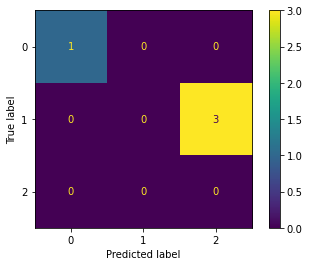

In [44]:
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()